**About Aerofit**

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import binom
import math
from scipy.stats import poisson
from matplotlib.cbook import boxplot_stats

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aerofit_treadmill.csv to aerofit_treadmill (1).csv


In [ ]:
df=pd.read_csv('/content/aerofit_treadmill.csv')

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.describe()


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
df['Product'].unique()


array(['KP281', 'KP481', 'KP781'], dtype=object)

In [ ]:
df['Product'].value_counts()


KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [ ]:
df['Product'].value_counts(normalize=True)*100

KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

In [ ]:
df['Age'].value_counts(normalize = True) * 100

25    13.888889
23    10.000000
24     6.666667
26     6.666667
28     5.000000
35     4.444444
33     4.444444
30     3.888889
38     3.888889
21     3.888889
22     3.888889
27     3.888889
31     3.333333
34     3.333333
29     3.333333
20     2.777778
40     2.777778
32     2.222222
19     2.222222
48     1.111111
37     1.111111
45     1.111111
47     1.111111
46     0.555556
50     0.555556
18     0.555556
44     0.555556
43     0.555556
41     0.555556
39     0.555556
36     0.555556
42     0.555556
Name: Age, dtype: float64

In [ ]:
df['Age'].value_counts().sort_index()


18     1
19     4
20     5
21     7
22     7
23    18
24    12
25    25
26    12
27     7
28     9
29     6
30     7
31     6
32     4
33     8
34     6
35     8
36     1
37     2
38     7
39     1
40     5
41     1
42     1
43     1
44     1
45     2
46     1
47     2
48     2
50     1
Name: Age, dtype: int64

In [ ]:
df['CategoricalAge'] = pd.cut(df['Age'],bins=[17, 30, 40, 50],labels=['Young Adults','Middle-Aged','Old'])
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CategoricalAge
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,Middle-Aged
176,KP781,42,Male,18,Single,5,4,89641,200,Old
177,KP781,45,Male,16,Single,5,5,90886,160,Old
178,KP781,47,Male,18,Partnered,4,5,104581,120,Old


In [ ]:
df['CategoricalAge'].unique()

['Young Adults', 'Middle-Aged', 'Old']
Categories (3, object): ['Young Adults' < 'Middle-Aged' < 'Old']

In [ ]:
df[['Gender', 'CategoricalAge']].value_counts()

Gender  CategoricalAge
Male    Young Adults      69
Female  Young Adults      51
Male    Middle-Aged       26
Female  Middle-Aged       22
Male    Old                9
Female  Old                3
dtype: int64

In [ ]:
df['CategoricalAge'].value_counts()


Young Adults    120
Middle-Aged      48
Old              12
Name: CategoricalAge, dtype: int64

In [ ]:
df['Gender'].value_counts()


Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
gkk =df.groupby(['Gender', 'CategoricalAge'])
gkk.count()

Product  Age  Education  MaritalStatus  Usage  Fitness  \
Gender CategoricalAge                                                           
Female Young Adults         51   51         51             51     51       51   
       Middle-Aged          22   22         22             22     22       22   
       Old                   3    3          3              3      3        3   
Male   Young Adults         69   69         69             69     69       69   
       Middle-Aged          26   26         26             26     26       26   
       Old                   9    9          9              9      9        9   

                       Income  Miles  
Gender CategoricalAge                 
Female Young Adults        51     51  
       Middle-Aged         22     22  
       Old                  3      3  
Male   Young Adults        69     69  
       Middle-Aged         26     26  
       Old                  9      9

In [ ]:
df[['Gender', 'CategoricalAge']].value_counts()

Gender  CategoricalAge
Male    Young Adults      69
Female  Young Adults      51
Male    Middle-Aged       26
Female  Middle-Aged       22
Male    Old                9
Female  Old                3
dtype: int64

In [ ]:
round(df[['Gender', 'CategoricalAge']].value_counts(normalize = True) * 100, 2)

Gender  CategoricalAge
Male    Young Adults      38.33
Female  Young Adults      28.33
Male    Middle-Aged       14.44
Female  Middle-Aged       12.22
Male    Old                5.00
Female  Old                1.67
dtype: float64

In [ ]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [ ]:
round(df['Education'].value_counts(normalize = True) * 100, 2)


16    47.22
14    30.56
18    12.78
15     2.78
13     2.78
12     1.67
21     1.67
20     0.56
Name: Education, dtype: float64

In [ ]:
round(df['MaritalStatus'].value_counts(normalize = True) * 100, 2)


Partnered    59.44
Single       40.56
Name: MaritalStatus, dtype: float64

In [ ]:
df[['Gender', 'MaritalStatus', 'CategoricalAge']].value_counts()

Gender  MaritalStatus  CategoricalAge
Male    Partnered      Young Adults      35
        Single         Young Adults      34
Female  Partnered      Young Adults      31
        Single         Young Adults      20
Male    Partnered      Middle-Aged       19
Female  Partnered      Middle-Aged       13
        Single         Middle-Aged        9
Male    Partnered      Old                7
        Single         Middle-Aged        7
Female  Partnered      Old                2
Male    Single         Old                2
Female  Single         Old                1
dtype: int64

In [ ]:
round(df[['Gender', 'MaritalStatus', 'CategoricalAge']].value_counts(normalize = True) * 100,2)


Gender  MaritalStatus  CategoricalAge
Male    Partnered      Young Adults      19.44
        Single         Young Adults      18.89
Female  Partnered      Young Adults      17.22
        Single         Young Adults      11.11
Male    Partnered      Middle-Aged       10.56
Female  Partnered      Middle-Aged        7.22
        Single         Middle-Aged        5.00
Male    Partnered      Old                3.89
        Single         Middle-Aged        3.89
Female  Partnered      Old                1.11
Male    Single         Old                1.11
Female  Single         Old                0.56
dtype: float64

In [ ]:
df['Usage'].value_counts()


3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

Inference: Most customers plan to use the treadmill 3 times a week.

69 customers plan to use the treadmill 3 times each week

52 customers plan to use the treadmill 4 times each week

33 customers plan to use the treadmill 2 times each week


In [ ]:
round(df['Usage'].value_counts(normalize = True) * 100, 2)


3    38.33
4    28.89
2    18.33
5     9.44
6     3.89
7     1.11
Name: Usage, dtype: float64

Inference: Percentage wise distribution shows maximum customers plan to use the treadmill 3 times a week

38.33% of the customers plan to use the treadmill 3 times each week

28.89% of the customers plan to use the treadmill 4 times each week

18.33% of the customers plan to use the treadmill 2 times each week


In [ ]:
df[['Usage', 'MaritalStatus']].value_counts()


Usage  MaritalStatus
3      Partnered        40
       Single           29
4      Partnered        29
       Single           23
2      Partnered        22
       Single           11
5      Partnered         9
       Single            8
6      Partnered         5
       Single            2
7      Partnered         2
dtype: int64

In [ ]:
round(df[['Usage', 'MaritalStatus']].value_counts(normalize = True) * 100, 2)


Usage  MaritalStatus
3      Partnered        22.22
       Single           16.11
4      Partnered        16.11
       Single           12.78
2      Partnered        12.22
       Single            6.11
5      Partnered         5.00
       Single            4.44
6      Partnered         2.78
       Single            1.11
7      Partnered         1.11
dtype: float64

Inference: Customers with Usage of 3 times a week and who are Partnered tend to contibute 22.22% to the sales

In [ ]:
df[['Gender', 'Usage', 'MaritalStatus']].value_counts()

Gender  Usage  MaritalStatus
Male    4      Partnered        22
        3      Partnered        21
Female  3      Partnered        19
Male    4      Single           16
        3      Single           15
Female  3      Single           14
        2      Partnered        13
Male    2      Partnered         9
Female  4      Partnered         7
               Single            7
        2      Single            7
Male    5      Single            6
Female  5      Partnered         5
Male    5      Partnered         4
        2      Single            4
        6      Partnered         3
Female  6      Partnered         2
        5      Single            2
Male    6      Single            2
        7      Partnered         2
dtype: int64

Inference: Partnered Males with usage 3 or 4 times a week tend to buy the most,
followed by partnered Females with usage 3.
This again tells us how the major sales are being made by Partnered customers, expecially Males with usage of 3 or 4 times a week

In [ ]:
round(df[['Gender', 'Usage', 'MaritalStatus']].value_counts(normalize = True) * 100, 2)

Gender  Usage  MaritalStatus
Male    4      Partnered        12.22
        3      Partnered        11.67
Female  3      Partnered        10.56
Male    4      Single            8.89
        3      Single            8.33
Female  3      Single            7.78
        2      Partnered         7.22
Male    2      Partnered         5.00
Female  4      Partnered         3.89
               Single            3.89
        2      Single            3.89
Male    5      Single            3.33
Female  5      Partnered         2.78
Male    5      Partnered         2.22
        2      Single            2.22
        6      Partnered         1.67
Female  6      Partnered         1.11
        5      Single            1.11
Male    6      Single            1.11
        7      Partnered         1.11
dtype: float64

Inference: Partnered Males with usage 3 or 4 times a week tend to buy the most with 23% contribution to the sales,
followed by partnered Females with usage 3 times a week contributing 10.56% contribution to the sales.

In [ ]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [ ]:
df['Fitness'].value_counts()


3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Inference:
97 sales are being made by customer with self-rated fitness level of 3.


In [ ]:
print(df['Income'].min(), df['Income'].max())


29562 104581


In [ ]:
df['CategoricalIncome'] = pd.cut(df['Income'],bins=[29000, 40000, 70000, 105000],labels=['lower-income','Middle-income','high_income'])

df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CategoricalAge,CategoricalIncome
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,lower-income
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,lower-income
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,lower-income
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,lower-income
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,lower-income


In [ ]:
df['CategoricalIncome'].unique()

['lower-income', 'Middle-income', 'high_income']
Categories (3, object): ['lower-income' < 'Middle-income' < 'high_income']

In [ ]:
df['CategoricalIncome'].value_counts()


Middle-income    125
lower-income      32
high_income       23
Name: CategoricalIncome, dtype: int64

Middle salary bracket(salary between 40,000-70,000) customers are contributing the most to the sales with a sum of 125 sales.

In [ ]:
df['Miles'].value_counts()


85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [ ]:
df['CategoricalMiles'] = pd.cut(df['Miles'],bins=[20, 100, 200, 360],labels=['20-100','100-200','200-360'])
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,CategoricalAge,CategoricalIncome,CategoricalMiles
0,KP281,18,Male,14,Single,3,4,29562,112,Young Adults,lower-income,100-200
1,KP281,19,Male,15,Single,2,3,31836,75,Young Adults,lower-income,20-100
2,KP281,19,Female,14,Partnered,4,3,30699,66,Young Adults,lower-income,20-100
3,KP281,19,Male,12,Single,3,3,32973,85,Young Adults,lower-income,20-100
4,KP281,20,Male,13,Partnered,4,2,35247,47,Young Adults,lower-income,20-100


In [ ]:
df['CategoricalMiles'].value_counts()


20-100     114
100-200     60
200-360      6
Name: CategoricalMiles, dtype: int64

Inference: A sum of 114 sales were made by customers expecting to walk/run each week between 20 and 100 miles.

Followed by, 60 sales made by customers expecting to walk/run each week between 100 and 200 miles.

Followed by, 6 sales made by customers expecting to walk/run each week between 200 and 360 miles.


In [ ]:
round(df['CategoricalMiles'].value_counts(normalize = True) * 100, 2)


20-100     63.33
100-200    33.33
200-360     3.33
Name: CategoricalMiles, dtype: float64

Inference: 63.33% sales were made by customers expecting to walk/run each week between 20 and 100 miles.

Followed by, 33.33% sales made by customers expecting to walk/run each week between 100 and 200 miles.

Followed by, 3.33% sales made by customers expecting to walk/run each week between 200 and 360 miles.


In [ ]:
df[['Gender', 'Product']].value_counts()

Gender  Product
Female  KP281      40
Male    KP281      40
        KP781      33
        KP481      31
Female  KP481      29
        KP781       7
dtype: int64

KP281: Both Male and Females have contributed the same amount of sales with a sum of 40 sales each.

KP481: Male customers have contributed 31 sales and Females have contributed 29 sales.

KP781: Male customers have contributed 33 sales and Females have contributed 7 sales.

Males dominate the sales with a huge margin for KP781 product.


In [ ]:
round(df[['Gender', 'Product']].value_counts(normalize = True) * 100, 2)


Gender  Product
Female  KP281      22.22
Male    KP281      22.22
        KP781      18.33
        KP481      17.22
Female  KP481      16.11
        KP781       3.89
dtype: float64

KP281: Both Male and Females have contributed the same amount of sales with a percentage of 22.22% of total sales.

KP481: Male customers have contributed 17.22% of sales and Females have contributed 16.11% of total sales.

KP781: Male customers have contributed 18.33% of total sales and Females have contributed 3.89% of sales.

Males dominate the sales with a huge margin for KP781 product.


In [ ]:
round(df[['Product', 'CategoricalAge']].value_counts(normalize = True) * 100, 2)


Product  CategoricalAge
KP281    Young Adults      30.56
KP481    Young Adults      19.44
KP781    Young Adults      16.67
KP481    Middle-Aged       12.78
KP281    Middle-Aged       10.56
         Old                3.33
KP781    Middle-Aged        3.33
         Old                2.22
KP481    Old                1.11
dtype: float64

Inference:

KP281: Young Adults(age 18-30) contributed the most to the sales with a percentage of 30.56% of total sales.

KP481: Young Adults(age 18-30) contributed the most to the sales with a percentage of 19.44% of total sales.

KP781: Young Adults(age 18-30) contributed the most to the sales with a percentage of 16.67% of total sales.


In [ ]:
df[['Product', 'CategoricalIncome']].value_counts()


Product  CategoricalIncome
KP281    Middle-income        57
KP481    Middle-income        51
KP281    lower-income         23
KP781    high_income          23
         Middle-income        17
KP481    lower-income          9
dtype: int64

Inference:

KP281: Middle salary group(salary range of 29000-40000) contributed the most to the sales with a sum of 57 out of total sales.

KP481: Middle salary group(salary range of 29000-40000) contributed the most to the sales with a sum of 51 out of total sales.

KP781: Experienced salary group(salary range of 70000-105000) contributed the most to the sales with a sum of 23 out of total sales.

In [ ]:
np.round(df[['Product', 'CategoricalIncome']].value_counts(normalize = True) * 100, 2)


Product  CategoricalIncome
KP281    Middle-income        31.67
KP481    Middle-income        28.33
KP281    lower-income         12.78
KP781    high_income          12.78
         Middle-income         9.44
KP481    lower-income          5.00
dtype: float64

Inference:

KP281: Middle salary group(salary range of 29000-40000) contributed the most to the sales with a percentage of 31.67% out of total sales.

KP481: Middle salary group(salary range of 29000-40000) contributed the most to the sales with a percentage of 28.33% out of total sales.

KP781: Experienced salary group(salary range of 70000-105000) contributed the most to the sales with a sum of 12.78% out of total sales.


In [ ]:
df[['Gender', 'Product', 'CategoricalAge', 'CategoricalIncome']].value_counts()


Gender  Product  CategoricalAge  CategoricalIncome
Male    KP281    Young Adults    Middle-income        17
Female  KP281    Young Adults    Middle-income        16
        KP481    Young Adults    Middle-income        15
Male    KP781    Young Adults    Middle-income        13
Female  KP281    Young Adults    lower-income         12
        KP481    Middle-Aged     Middle-income        12
Male    KP781    Young Adults    high_income          11
        KP481    Middle-Aged     Middle-income        11
                 Young Adults    Middle-income        11
        KP281    Middle-Aged     Middle-income        10
                 Young Adults    lower-income         10
Female  KP281    Middle-Aged     Middle-income         8
Male    KP481    Young Adults    lower-income          7
        KP781    Middle-Aged     high_income           5
Female  KP781    Young Adults    Middle-income         4
Male    KP781    Old             high_income           4
        KP281    Old             Midd

Inference:

KP281: Male, Young Adult(18-30 years) customers with Middle salary group(salary range of 29000-40000) contributed the most to the sales with a sum of 17 out of total sales.

KP481: Female Young Adults with Middle salary group(salary range of 29000-40000) contributed the most to the sales with a sum of 15 out of total sales.

KP781: Male, Young Adult(18-30 years) customers with Middle salary group(salary range of 29000-40000) contributed the most to the sales with a sum of 13 out of total sales.


In [ ]:
df.isnull().sum()

Product              0
Age                  0
Gender               0
Education            0
MaritalStatus        0
Usage                0
Fitness              0
Income               0
Miles                0
CategoricalAge       0
CategoricalIncome    0
CategoricalMiles     0
dtype: int64


#Visual Analysis - Univariate & Bivariate


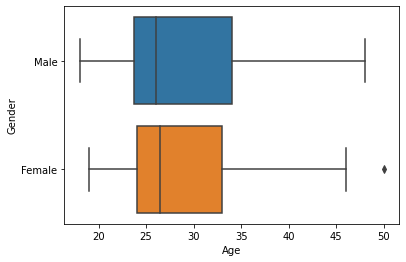

In [ ]:
sns.boxplot(x='Age', y= "Gender", data=df)
plt.show()


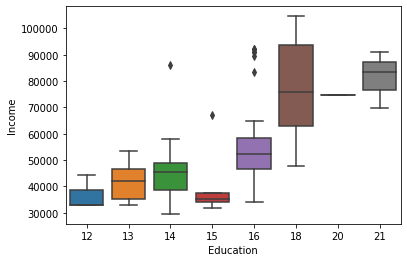

In [ ]:
sbn.boxplot(x='Education', y='Income', data=df)

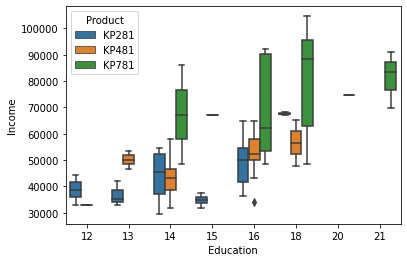

In [ ]:
sbn.boxplot(x='Education', y='Income', hue='Product', data=df)

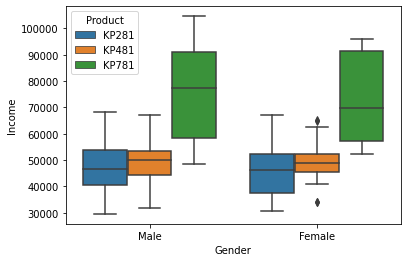

In [ ]:
sbn.boxplot(x='Gender', y='Income', hue='Product', data=df)

Inference:

KP281: Customers with salary between 40000 and 55000 are buying KP281.

KP481: Customers with salary between 45000 and 55000 are buying KP481.

KP781: Customers with salary between 58000 and 90000 are buying KP781.


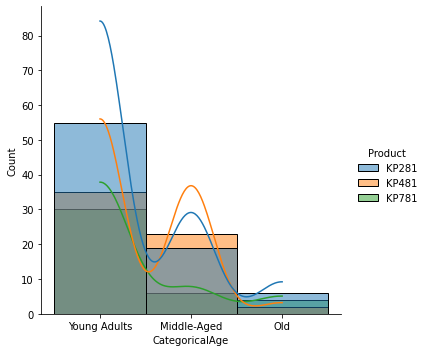

In [ ]:
sns.displot(data=df, x="CategoricalAge",hue="Product",kde=True)

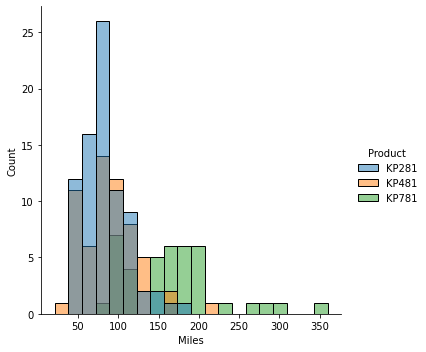

In [ ]:
sns.displot(data=df, x="Miles",hue="Product")

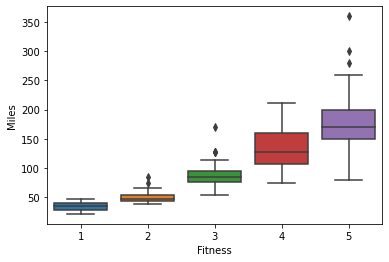

In [ ]:
sns.boxplot(data=df, x="Fitness", y="Miles")

catagogry 5 fitness  member walks more as they are not in good shape.

where as catagory 1 member walk less as they are more in good shape.


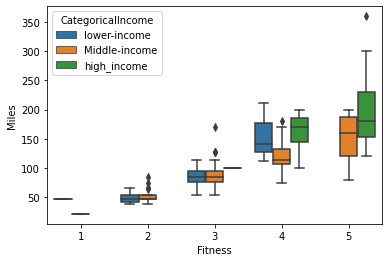

In [ ]:
sns.boxplot(data=df, x="Fitness", y="Miles", hue='CategoricalIncome')

it seems as more expeirened and high income people are out of shape and walk more

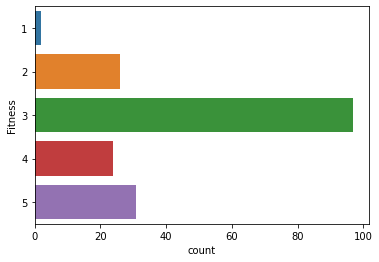

In [ ]:
sns.countplot(data=df,y=df['Fitness'])
plt.show()


Inference: Most of the customers contributing to the sales have Self-rated themselves 3 on fitness level and are contributing more than 90 sales
out of total sales.


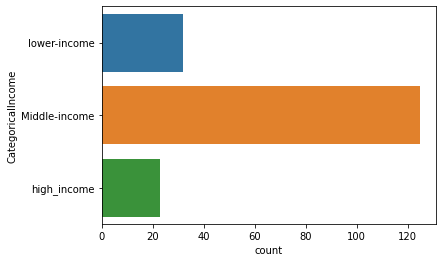

In [ ]:
sns.countplot(data=df,y=df['CategoricalIncome'])
plt.show()

Inference: Most of the customers contributing to the sales lie in the Middle salary group(salary range of 40,000-70,000) and are contributing
more than 120 sales out of total sales.


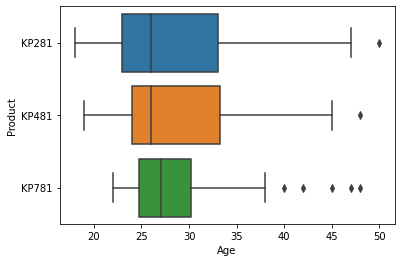

In [ ]:
sns.boxplot(data=df,y=df['Product'],x=df['Age'])
plt.show()

Inference:

KP281: Customers with age between 23 and 33 are buying KP281.

KP481: Customers with age between 24 and 33 are buying KP481.

KP781: Customers with age between 25 and 30 are buying KP781.

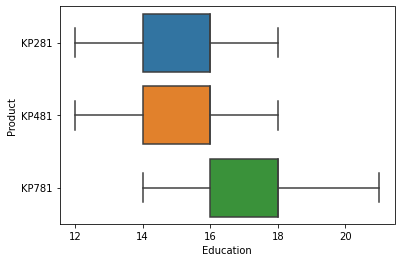

In [ ]:
sns.boxplot(data=df,y=df['Product'],x=df['Education'])
plt.show()


Inference:

KP281: Customers with years of education between 14 and 16 are buying KP281.

KP481: Customers with years of education between 14 and 16 are buying KP481.

KP781: Customers with years of education between 16 and 18 are buying KP781.


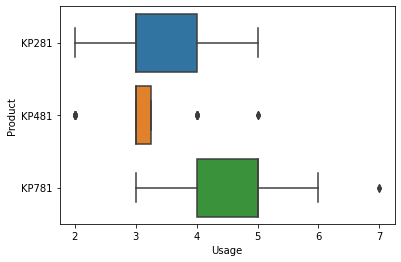

In [ ]:
sns.boxplot(data=df,y=df['Product'],x=df['Usage'])
plt.show()


Inference:

KP281: Customers with expected usage between 3 and 4 are buying KP281.

KP481: Customers with expected usage of 3 are buying KP481.

KP781: Customers with expected usage between 4 and 5 are buying KP781.


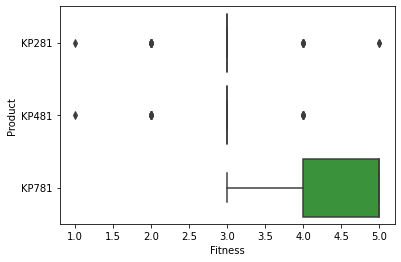

In [ ]:
sns.boxplot(data=df,y=df['Product'],x=df['Fitness'])
plt.show()


Inference:

KP281: Customers with self-rated Fitness level of 3 are buying KP281.

KP481: Customers with self-rated Fitness level of 3 are buying KP481.

KP781: Customers with self-rated Fitness level between 3 and 5 are buying KP781.

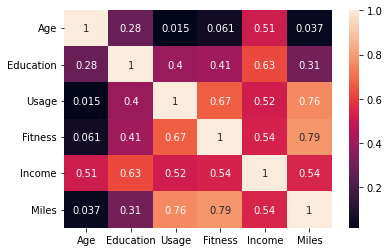

In [ ]:
sbn.heatmap(df.corr(), annot=True)

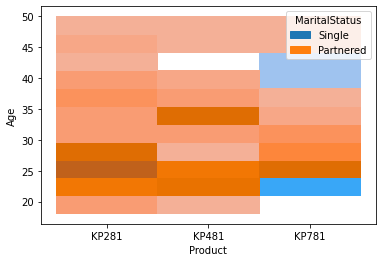

In [ ]:
sns.histplot(data=df, x="Product", y = "Age", hue= 'MaritalStatus')
plt.show()


Inference:

KP281: Customers who are partnered, having age between 22 to 30 years are contributing the most to the sales of KP281.

KP481: Customers who are partnered, having age between 33 to 35 years are contributing the most to the sales of KP481.

KP781: Customers who are partnered, having age of 25 years are contributing the most to the sales of KP781 whereas customers who are
single with age between 22 and 24 are contributing the most to the sales of KP781.

# Probability:

In [ ]:
pd.crosstab(index=df['Product'],columns=df['CategoricalAge'], margins = True)


CategoricalAge,Young Adults,Middle-Aged,Old,All
Product,,,,
KP281,55,19,6,80
KP481,35,23,2,60
KP781,30,6,4,40
All,120,48,12,180


In [ ]:
prob_of_young_adults_bought_KP281 = len(df[(df['CategoricalAge'] == 'Young Adults') & (df['Product'] == 'KP281')])

prob_of_young_adults_bought_KP481 = len(df[(df['CategoricalAge'] == 'Young Adults') & (df['Product'] == 'KP481')])

prob_of_young_adults_bought_KP781 = len(df[(df['CategoricalAge'] == 'Young Adults') & (df['Product'] == 'KP781')])

print('P[\'Young adults bought KP281\'] =', round(prob_of_young_adults_bought_KP281,2))
print('P[\'Young adults bought KP481\'] =', round(prob_of_young_adults_bought_KP481,2))
print('P[\'Young adults bought KP781\'] =', round(prob_of_young_adults_bought_KP781,2))

P['Young adults bought KP281'] = 55
P['Young adults bought KP481'] = 35
P['Young adults bought KP781'] = 30


Inference:

Young Adults(18-30 years of age) contribute the highest to the sales of treadmills.

Product KP281 has been bought majorly by the age group of 18-30 years with the probability of .31

Product KP481 has been bought majorly by the age group of 18-30 years with the probability of .19

Product KP781 has been bought majorly by the age group of 18-30 years with the probability of .17

## Conditional Probability:

In [ ]:
prob_of_young_adults_given_KP281 = len(df[(df['CategoricalAge'] == 'Young Adults') & (df['Product'] == 'KP281')])
prob_of_young_adults_given_KP481 = len(df[(df['CategoricalAge'] == 'Young Adults') & (df['Product'] == 'KP481')])

prob_of_young_adults_given_KP781 = len(df[(df['CategoricalAge'] == 'Young Adults') & (df['Product'] == 'KP781')])
print('P[\'Young adults given KP281\'] =', round(prob_of_young_adults_given_KP281,2))
print('P[\'Young adults given KP481\'] =', round(prob_of_young_adults_given_KP481,2))
print('P[\'Young adults given KP781\'] =', round(prob_of_young_adults_given_KP781,2))



P['Young adults given KP281'] = 55
P['Young adults given KP481'] = 35
P['Young adults given KP781'] = 30


Inference:

Young Adults(18-30 years of age) contribute the highest to the sales of treadmills.

probability that the customer is a young adult given that the product bought is KP281 -> .69

probability that the customer is a young adult given that the product bought is KP481 -> .58

probability that the customer is a young adult given that the product bought is KP781 -> .75

In [ ]:
round(pd.crosstab(index=df['Product'],columns=df['CategoricalAge'], normalize = True, margins = True) * 100, 2)


CategoricalAge,Young Adults,Middle-Aged,Old,All
Product,,,,
KP281,30.56,10.56,3.33,44.44
KP481,19.44,12.78,1.11,33.33
KP781,16.67,3.33,2.22,22.22
All,66.67,26.67,6.67,100.00


Inference:

44.44% of customers have purchased KP281 product.

33.33% of customers have purchased KP481 product.

22.22% of customers have purchased KP781 product.

In [ ]:
pd.crosstab(index=df['Product'],columns=df['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


Probability of Male customers given KP781 is bought.

In [ ]:
prob_of_male_bought_KP281 = len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP281')])/len(df) #proba
prob_of_male_bought_KP481 = len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP481')])/len(df) #proba
prob_of_male_bought_KP781 = len(df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')])/len(df) #proba
print('P[\'Male bought KP281\'] =', round(prob_of_male_bought_KP281,2))
print('P[\'Male bought KP481\'] =', round(prob_of_male_bought_KP481,2))
print('P[\'Male bought KP781\'] =', round(prob_of_male_bought_KP781,2))


P['Male bought KP281'] = 0.22
P['Male bought KP481'] = 0.17
P['Male bought KP781'] = 0.18


### What is the probability of a male customer buying a KP781 treadmill


In [ ]:
prob_male_buying_KP781 = round(33/180,3) # What is the probability of a male customer buying a KP781 treadmill
prob_male_buying_KP781


0.183

In [ ]:
prob_male_buying_KP481 = round(31/180,3) # What is the probability of a male customer buying a KP481 treadmill
prob_male_buying_KP481


0.172

In [ ]:
prob_male_buying_KP281 = round(40/180,3) # What is the probability of a male customer buying a KP281 treadmill
prob_male_buying_KP281


0.222

Probability of Male buying a KP281 treadmill is 0.222

Probability of Male buying a KP481 treadmill is 0.172

Probability of Male buying a KP781 treadmill is 0.183


In [ ]:
round(pd.crosstab(index=df['Product'],columns=df['Gender'], normalize = True, margins = True) * 100, 2)


Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


44.44% of customers have purchased KP281.

33.33% of customers have purchased KP481.

22.22% of customers have purchased KP781.

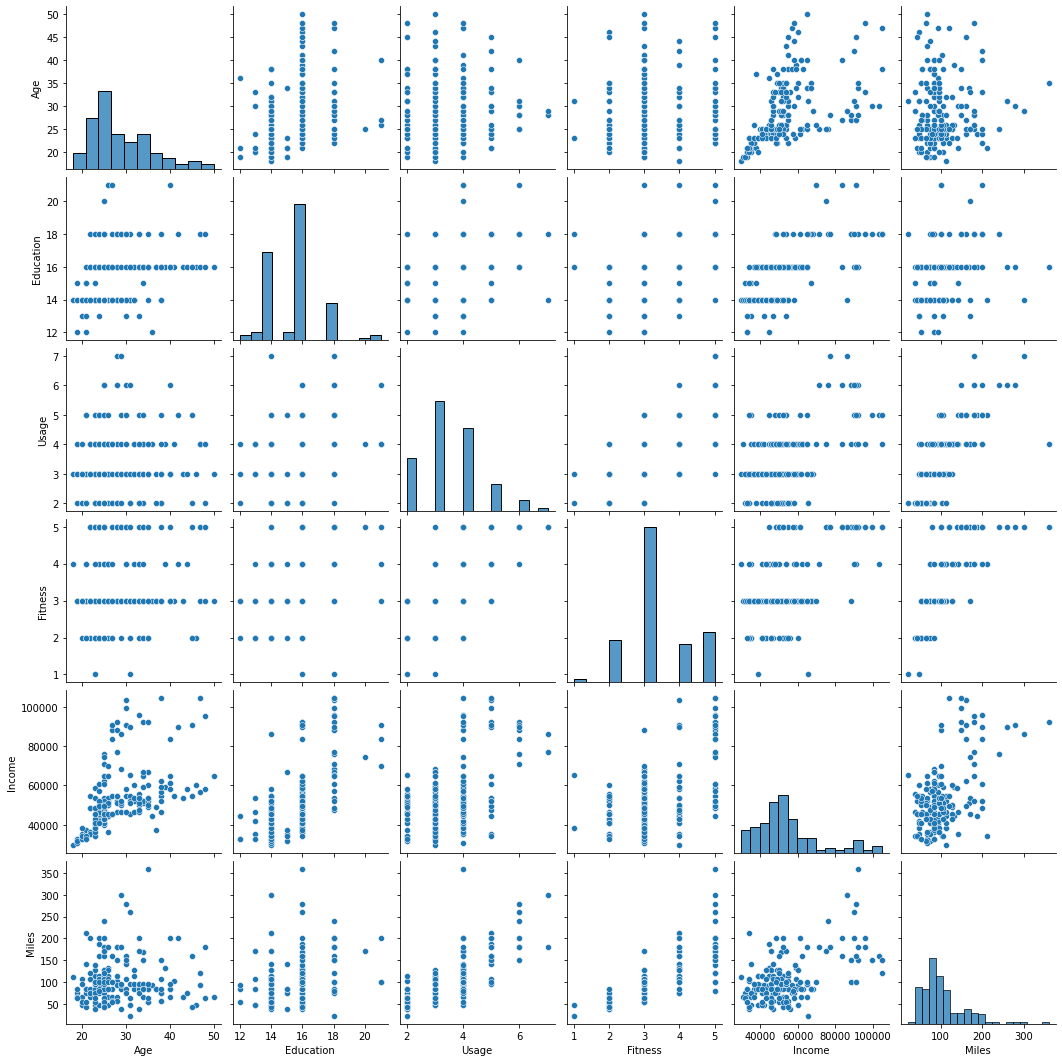

In [ ]:
sns.pairplot(data = df)

In [ ]:
round(pd.crosstab(index=df['Product'],columns=df['Gender'], normalize = True, margins = True) * 100, 2)


Gender,Female,Male,All
Product,,,
KP281,22.22,22.22,44.44
KP481,16.11,17.22,33.33
KP781,3.89,18.33,22.22
All,42.22,57.78,100.00


In [ ]:
pd.crosstab(index=df['Product'],columns=df['Gender'], margins = True)


Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


# Recommendations/Suggestions for Aerofit:

Marketing spends can focus more on 18-30 age group because they show dominance in buying most of the products.

Income Range to be selected should be between 50k and 70k as that range of customers are buying the most products.

Should Focus on Married Male/Female customers particularly as they are also the prime source of sales for Aerofit.

high income catagory people are mostly unfit and walk more miles so KP781 like advace product would suite them more in long term.
